# Workshop 3: Data Analysis

## Exercise 1: Illegal Imports

Import all the python packages that will be required through this workshop. Then, create your own csv file with at least two rows and three columns (I leave the contents up to you) and import it into python. Print out the contents of your file in the cell below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Create a sample CSV file
csv_data = """Name,Age,Country
John Doe,29,USA
Jane Smith,34,Canada"""

# Save the CSV data to a file
file_path = "random.csv"
with open(file_path, "w") as file:
    file.write(csv_data)

# Read the CSV file and print its contents without using pandas
with open(file_path, "r") as file:
    for line in file:
        print(line.strip())


Name,Age,Country
John Doe,29,USA
Jane Smith,34,Canada


## Exercise 2: Data Framed

Sample 10 of your classmates for their favorite movies. Then create a Pandas dataframe where one column lists the classmates and the other lists their associated movie.

In [26]:
classmates = ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Hannah", "Isaac", "Jack"]
movies = ["Inception", "The Matrix", "Interstellar", "The Godfather", "Pulp Fiction", "The Dark Knight", "Fight Club", "Forrest Gump", "Star Wars", "The Shawshank Redemption"]
dataset = list(zip(classmates,movies))
df = pd.DataFrame(dataset, columns=['Classmates','Fav Movies'])
print(df)

  Classmates                Fav Movies
0      Alice                 Inception
1        Bob                The Matrix
2    Charlie              Interstellar
3      David             The Godfather
4        Eve              Pulp Fiction
5      Frank           The Dark Knight
6      Grace                Fight Club
7     Hannah              Forrest Gump
8      Isaac                 Star Wars
9       Jack  The Shawshank Redemption


## Exercise 3: Population Control

Import the nationData.csv file. Use that data to create a histogram or bar graph of the population of the different South American nations. What is something about the population of the South American continent that you can learn from this plot?

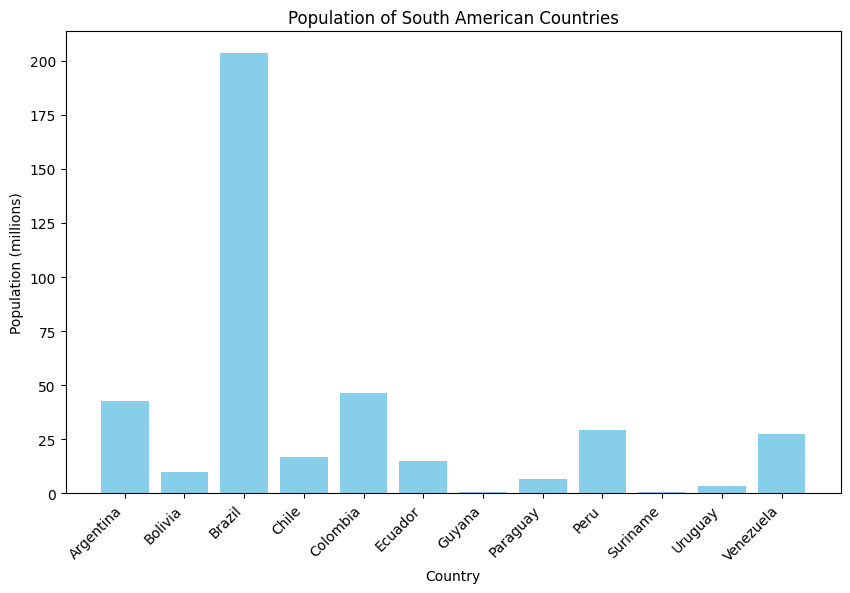

In [3]:
df = pd.read_csv('files/nationData.csv')
countries = df['Country']
populations = df['Population']

# Create bar graph
plt.figure(figsize=(10, 6))
plt.bar(countries, populations, color='skyblue')

# Add title and labels
plt.title('Population of South American Countries')
plt.xlabel('Country')
plt.ylabel('Population (millions)')

plt.xticks(rotation=45, ha='right')
plt.show()

#brazil is crazy overpopulated

## Exercise 4: Campbell Hall Projectile Test

Read in the file named "projectile.csv" into a python. Print out your data, then plot the data in a scatterplot of position vs time.

Text(0.5, 0, 'Positon[m]')

<Figure size 640x480 with 0 Axes>

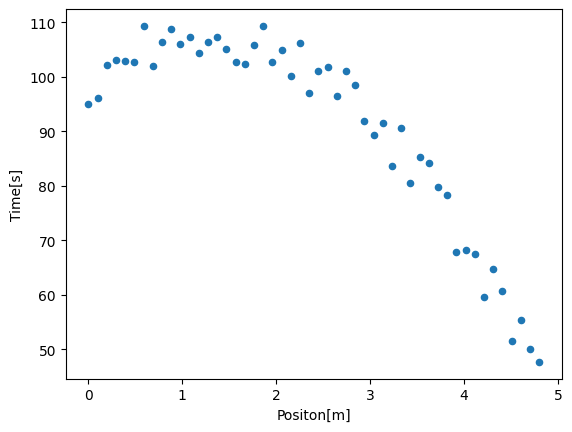

In [5]:
df = pd.read_csv('files/projectile.csv')
df.columns
positions= df['Position [m]']
times = df['Time [s]']

plt.figure()
df.plot.scatter('Time [s]', 'Position [m]')
plt.ylabel('Time[s]')
plt.xlabel('Positon[m]')

## Exercise 5: Stellar Nuclear Energy Generation

Import the isochrone.csv into a pandas dataframe. This data set lists the stellar properties of stars of different masses (measured relative to the mass of the sun). Plot the central temperature and density for each
star as a function of initial mass for stars on the main-sequence. What do these plots tell you?

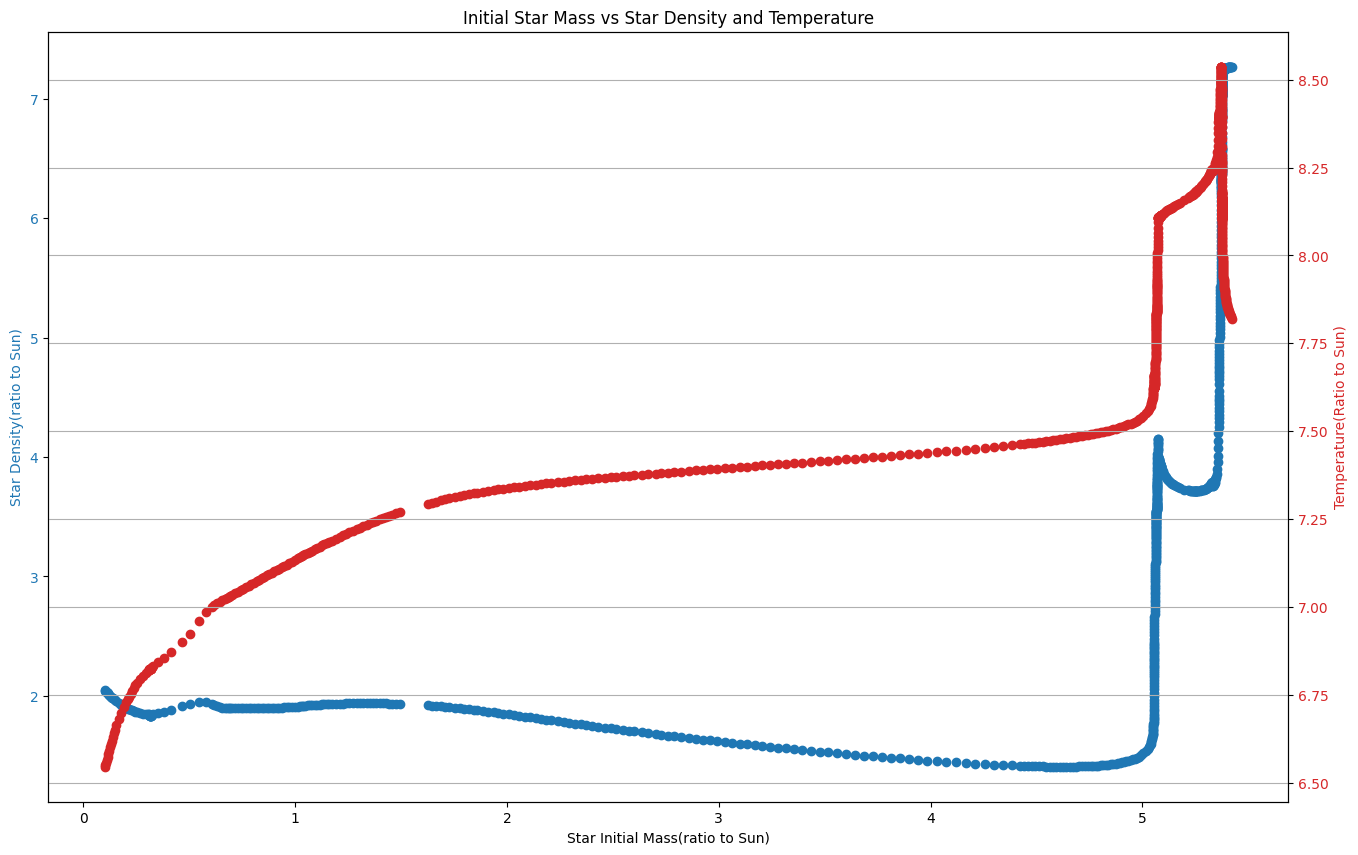

In [10]:
df = pd.read_csv('files/isochrone.csv')
temps = df['log_center_T']
density = df['log_center_Rho'] #assuming that log_center_rho is density
initial_mass = df['initial_mass']

fig, ax1 = plt.subplots(figsize=(16, 10))
color = 'tab:blue'
ax1.set_ylabel('Star Density(ratio to Sun)',color=color)
ax1.set_xlabel('Star Initial Mass(ratio to Sun)', )
ax1.scatter(initial_mass,density, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temperature(Ratio to Sun)', color=color)
ax2.scatter(initial_mass, temps, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Initial Star Mass vs Star Density and Temperature')
plt.grid(True)

#I really need to know if this looks wonky, It can't be right

## Exercise 6: Presidential Pandas

This week you were shown how python and pandas can be used to study and understand the behavior of voters in U.S. elections. Now, you are going to try to do a little of that yourself. 
1. Use pandas to load in the 1976-2020-presdient.csv file into a dataframe. Pick one state from the dataframe to study (just for my own curiosity also list why you picked your state). 
1. Create a plot showing the number of votes the Republican candiadate and Democratic candidate recieved in your state each year since 1976 (should be one plot with two lines on it properly labeled so it is easy to read). Your plot should also display the number of third party votes cast in each election (lumping all third parties into one group). 
1. Finally, create a histogram showing the number of times a certain party's candidate recieved the most votes in your state (again you can lump all the third parties together). What does your analysis tell you about the voting trends in your state? 

[[1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020], [np.int64(460801), np.int64(368009), np.int64(454975), np.int64(621453), np.int64(629681), np.int64(671152), np.int64(738227), np.int64(1001732), np.int64(1288576), np.int64(1323101), np.int64(1338870), np.int64(1804352)], [np.int64(584278), np.int64(652264), np.int64(821817), np.int64(728177), np.int64(562850), np.int64(691848), np.int64(883748), np.int64(1101255), np.int64(1073589), np.int64(1185243), np.int64(1202484), np.int64(1364607)], [np.int64(36361), np.int64(164177), np.int64(18588), np.int64(22764), np.int64(376649), np.int64(147702), np.int64(119393), np.int64(26643), np.int64(39196), np.int64(61172), np.int64(238866), np.int64(111021)]]


Text(0, 0.5, 'Times Won')

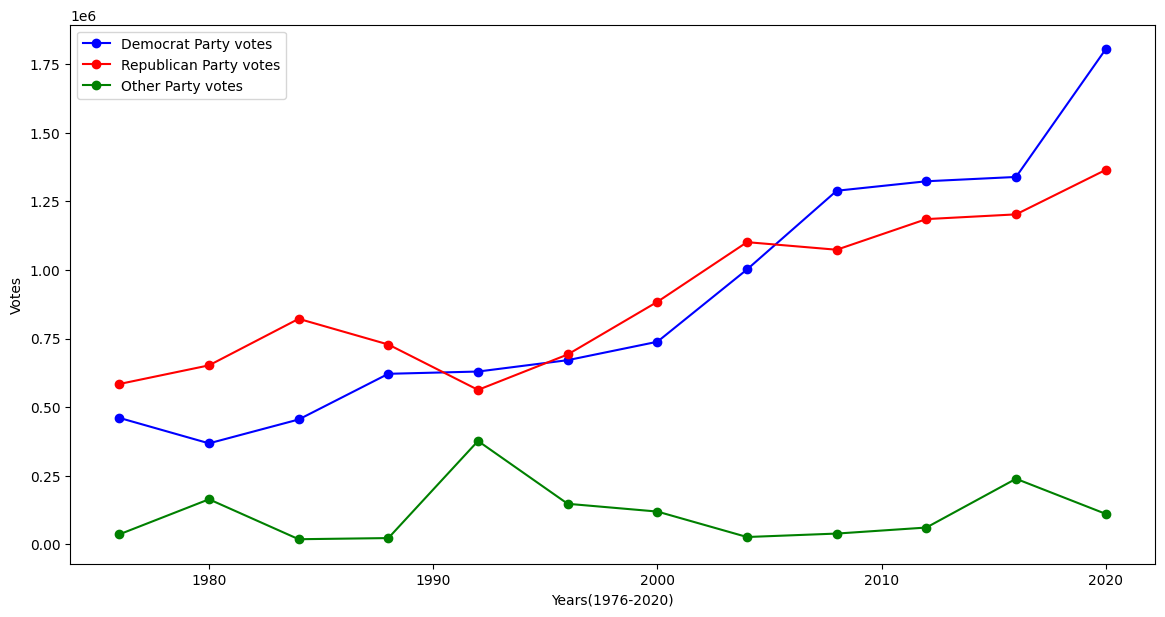

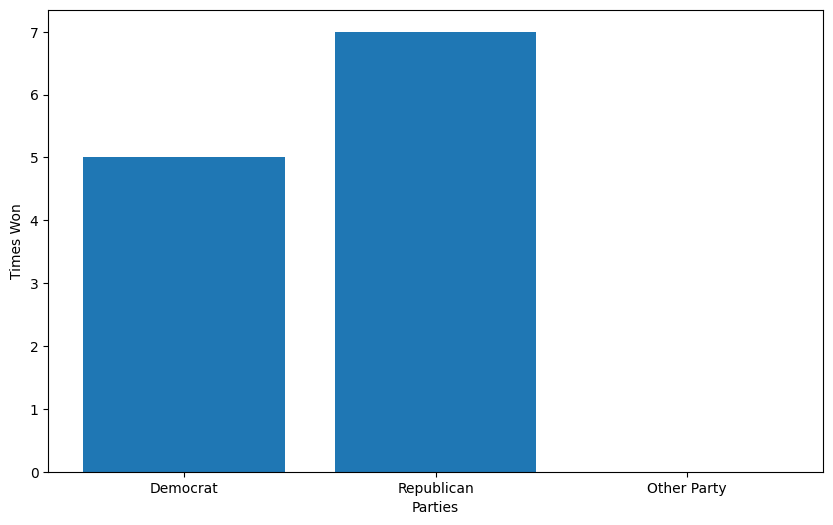

In [13]:
df = pd.read_csv('files/1976-2020-president.csv')
df = df[df['state'] == 'COLORADO']
key_info = [[],[],[],[]]
for year in range(1976,2024,4):
    df_year = df[df['year'] == year].reset_index()
    key_info[0].append(year)
    d_votes = 0
    r_votes = 0
    o_votes = 0
    for i in range(0,len(df_year)):
        if df_year.loc[i,'party_detailed'] == "DEMOCRAT":
            d_votes += df_year.loc[i,'candidatevotes']
        if df_year.loc[i,'party_detailed'] == "REPUBLICAN":
            r_votes += df_year.loc[i,'candidatevotes']
        if df_year.loc[i,'party_detailed'] != "DEMOCRAT" and df_year.loc[i,'party_detailed'] != "REPUBLICAN":
            o_votes += df_year.loc[i,'candidatevotes']
    key_info[1].append(d_votes)
    key_info[2].append(r_votes)
    key_info[3].append(o_votes)

print(key_info)

plt.figure(figsize=(14, 7))
plt.plot(key_info[0],key_info[1] , 'b-', marker = 'o', label = 'Democrat Party votes')
plt.plot(key_info[0],key_info[2] , 'r-', marker = 'o', label = 'Republican Party votes')
plt.plot(key_info[0],key_info[3] , 'g-', marker = 'o', label = 'Other Party votes')
plt.legend()
plt.xlabel('Years(1976-2020)')
plt.ylabel('Votes')

winners = [0,0,0]
for i in range(len(key_info[0])):
    if max(key_info[1][i],key_info[2][i],key_info[3][i]) == key_info[1][i]:
        winners[0]+=1
    elif max(key_info[1][i],key_info[2][i],key_info[3][i]) == key_info[2][i]:
        winners[1]+=1
    elif max(key_info[1][i],key_info[2][i],key_info[3][i]) == key_info[3][i]:
        winners[2]+=1

plt.figure(figsize=(10, 6))
plt.bar(['Democrat','Republican','Other Party'],winners)
plt.xlabel('Parties')
plt.ylabel('Times Won')